In [37]:
import re
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import svm 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [38]:
dataframe = pd.read_csv("refined1.csv")
dataframe = dataframe.fillna(0)
dataframe = dataframe.iloc[:,1:] # all columns but not the first. with all rows

print('loaded')
dataframe.head(20)

# to change type of colomn 'event_start_date' from str to datetime

import datetime as dt
dataframe['event_start_date'] = dataframe['event_start_date'].apply(lambda x:dt.datetime.strptime(x,'%d%b%y:%H:%M:%S'))
dataframe.dtypes

loaded


hash_number_A                         int64
hash_tariff                           int64
event                                 int64
event_sub                             int64
network_service_direction             int64
event_start_date             datetime64[ns]
hash_b_number                       float64
number_B_category                   float64
cost                                float64
call_duration_minutes               float64
data_volume_mb                      float64
hash_accum_code                     float64
LAT                                 float64
LON                                 float64
device_type                           int64
phone_price_category                  int64
interest_1                            int64
interest_2                            int64
interest_3                            int64
interest_4                            int64
interest_5                            int64
test_flag                             int64
target                          

In [115]:
import datetime as dt
from datetime import datetime
today = datetime.strptime('2017-09-01 20:48:39',  "%Y-%m-%d %H:%M:%S")
dataframe['dayspassed'] = dataframe['event_start_date'].apply(lambda x:(today-x).days)
dataframe.head()

,hash_number_A,hash_tariff,event,event_sub,network_service_direction,event_start_date,hash_b_number,number_B_category,cost,call_duration_minutes,...,device_type,phone_price_category,interest_1,interest_2,interest_3,interest_4,interest_5,test_flag,target,dayspassed
0,1001309,45807,1,1,1,2017-06-19 16:37:02,1.0,0.0,0.0,0.416667,...,1,8,1,1,1,1,1,0,0,74
1,640090,221688,1,1,2,2017-08-21 10:48:25,2.0,0.0,0.0,4.000000,...,1,8,2,2,2,2,2,0,0,11
2,1117021,223058,1,1,1,2017-08-11 09:55:56,3.0,0.0,0.0,1.633333,...,2,6,2,2,2,2,2,0,0,21
3,2513535,187131,1,1,1,2017-08-13 12:30:05,4.0,0.0,0.0,0.266667,...,1,8,3,3,3,3,2,0,0,19
4,1001309,45807,1,1,1,2017-07-19 08:31:25,1.0,0.0,0.0,11.316667,...,1,8,1,1,1,1,1,0,0,44


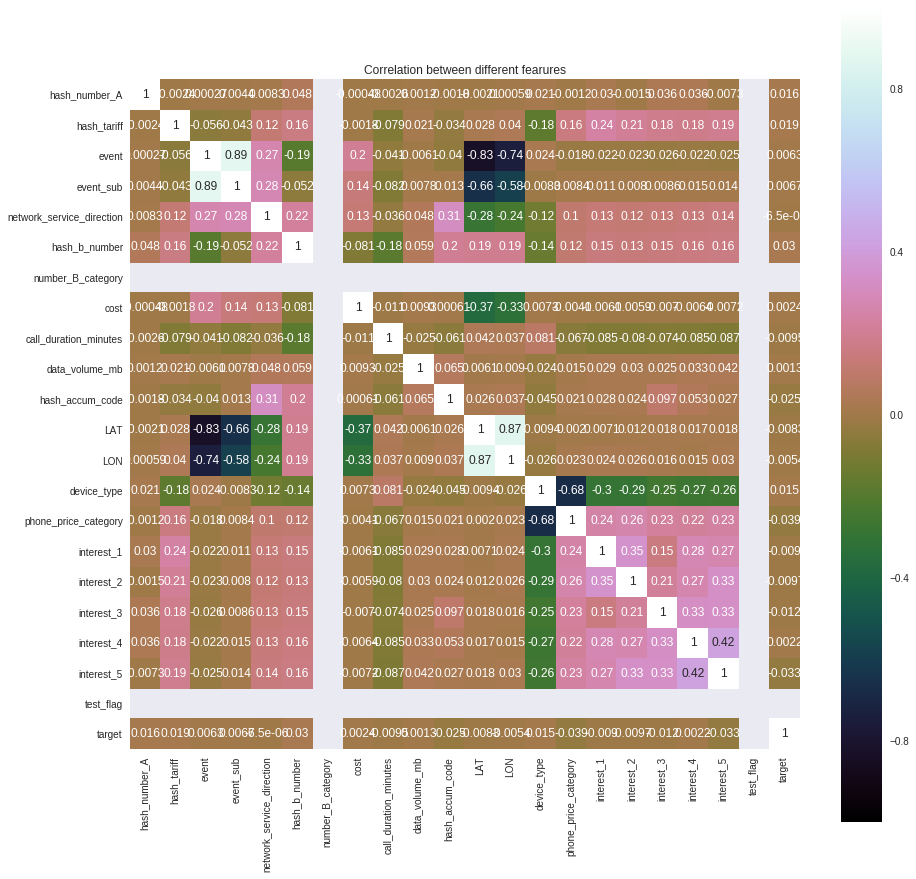

In [50]:
df = dataframe.loc[dataframe.test_flag==0]
#print(len(testdata))
#testdata.dtypes

correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different fearures')
plt.show()

In [94]:

# dataframe with unique hash_number_A
hash_number_unique = df.hash_number_A.unique()
COLUMN_NAMES = ['hash_number_A', 'hash_tariff', 'event', 'event_sub', 
                'network_service_direction',
                'event_start_date',
                #'LAT', 'LON',
                'cost', 'hash_b_number',
                'number_B_category', 'call_duration_minutes',
                'data_volume_mb', 'hash_accum_code', 'device_type', 'phone_price_category',
                'interest_1', 'interest_2', 'interest_3', 'interest_4', 'interest_5', 'target']
aggrdf = pd.DataFrame(columns=COLUMN_NAMES)

aggrdf['hash_number_A'] = hash_number_unique
aggrdf = aggrdf.fillna(0)
print("aggrdf.shape = ",  aggrdf.shape)

aggrdf['hash_tariff'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['hash_tariff'])
aggrdf['event'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['event'])
aggrdf['event_sub'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['event_sub'])
event_sub_1_dayspassed = today - 

aggrdf['network_service_direction'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['network_service_direction'])
aggrdf['event_start_date'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['event_start_date'])
aggrdf['cost'] = df['hash_number_A'].map(df.groupby('hash_number_A').sum()['cost'])
aggrdf['hash_b_number'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['hash_b_number'])
aggrdf['number_B_category'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['number_B_category'])
aggrdf['call_duration_minutes'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['call_duration_minutes'])
aggrdf['data_volume_mb'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['data_volume_mb'])
aggrdf['hash_accum_code'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['hash_accum_code'])
aggrdf['device_type'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['device_type'])
aggrdf['phone_price_category'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['phone_price_category'])
aggrdf['interest_1'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['interest_1'])
aggrdf['interest_2'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['interest_2'])
aggrdf['interest_3'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['interest_3'])
aggrdf['interest_4'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['interest_4'])
aggrdf['interest_5'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['interest_5'])
aggrdf['target'] = df['hash_number_A'].map(df.groupby('hash_number_A').max()['target'])
aggrdf.head()

aggrdf.shape =  (7990, 20)


,hash_number_A,hash_tariff,event,event_sub,network_service_direction,event_start_date,cost,hash_b_number,number_B_category,call_duration_minutes,data_volume_mb,hash_accum_code,device_type,phone_price_category,interest_1,interest_2,interest_3,interest_4,interest_5,target
0,1001309,45807.0,7.0,418.0,3.0,2017-08-31 04:50:52,650.1199,2944117.0,0.0,30.0,200.071501,546.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0,0.0
1,640090,221688.0,7.0,412.0,3.0,2017-08-31 20:17:58,273.4566,2943591.0,0.0,30.0,0.000423,534.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,0.0
2,1117021,223058.0,7.0,414.0,3.0,2017-08-31 20:48:39,586.8355,2942684.0,0.0,30.0,0.000000,534.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,0.0
3,2513535,187131.0,6.0,293.0,3.0,2017-08-31 22:07:27,140.2007,2943591.0,0.0,25.0,637.867165,551.0,1.0,8.0,3.0,3.0,3.0,3.0,2.0,0.0
4,167222,45807.0,7.0,418.0,3.0,2017-08-31 04:50:52,650.1199,2944117.0,0.0,30.0,200.071501,546.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0,0.0


In [96]:
k = int(hash_number_unique.size*0.4)
# dftrain_hash, 
#dftest_hash 

dftrain_hash = hash_number_unique[0:k]
dfval_hash = hash_number_unique[k:]
print(hash_number_unique.shape )

dftrain  = aggrdf[aggrdf['hash_number_A'].isin(dftrain_hash)]
dfval   = aggrdf[aggrdf['hash_number_A'].isin(dfval_hash)]

dftrain = dftrain.fillna(0)
dfval = dfval.fillna(0)

print("dftrain.shape =", dftrain.shape)
print("dfval.shape = ",  dfval.shape)

dftrain.head()
dfval.head()

(7990,)
dftrain.shape = (3196, 20)
dfval.shape =  (4794, 20)


,hash_number_A,hash_tariff,event,event_sub,network_service_direction,event_start_date,cost,hash_b_number,number_B_category,call_duration_minutes,data_volume_mb,hash_accum_code,device_type,phone_price_category,interest_1,interest_2,interest_3,interest_4,interest_5,target
3196,637708,221688.0,7.0,410.0,3.0,2017-08-31 19:33:35,278.3470,2942684.0,0.0,30.0,0.000000,309.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,0.0
3197,1858374,223058.0,6.0,205.0,3.0,2017-08-31 20:29:58,423.9963,2943591.0,0.0,31.0,271.670698,534.0,1.0,8.0,3.0,3.0,5.0,11.0,4.0,0.0
3198,2696808,0.0,0.0,0.0,0.0,1970-01-01 00:00:00,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3199,2465999,238465.0,7.0,411.0,3.0,2017-08-31 23:09:39,300.0968,2942684.0,0.0,31.0,0.000000,534.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,0.0
3200,559058,221688.0,6.0,136.0,3.0,2017-08-31 22:36:38,990.8900,2943591.0,0.0,31.0,69.309426,534.0,1.0,8.0,3.0,4.0,4.0,3.0,11.0,0.0


In [97]:
# GaussianNB

X_train = dftrain[['hash_number_A', 'hash_tariff', 'event', 'event_sub', 
        'network_service_direction',
#        'event_start_date',
#        'LAT', 'LON',
        'cost', 'hash_b_number',
        'number_B_category', 'call_duration_minutes',
        'data_volume_mb', 'hash_accum_code', 'device_type', 'phone_price_category',
        'interest_1', 'interest_2', 'interest_3', 'interest_4', 'interest_5']]
y_train = np.ravel(dftrain[['target']])

#X_train, X_val, y_train, y_val = train_test_split( X, Y, test_size=0.4, random_state=40)
clf = GaussianNB()
clf = clf.fit(X_train ,y_train)

X_val = dfval[['hash_number_A', 'hash_tariff', 'event', 'event_sub', 
        'network_service_direction',
#        'event_start_date',
#        'LAT', 'LON',
        'cost', 'hash_b_number',
        'number_B_category', 'call_duration_minutes',
        'data_volume_mb', 'hash_accum_code', 'device_type', 'phone_price_category',
        'interest_1', 'interest_2', 'interest_3', 'interest_4', 'interest_5']]
y_val = np.ravel(dfval[['target']])
clf.score(X_val, y_val)

0.27847309136420528

In [99]:
dftest = dataframe.loc[dataframe.test_flag==1]

X = dftest[['hash_number_A', 'hash_tariff', 'event', 'event_sub', 
        'network_service_direction',
        #'event_start_date',
        #'LAT', 'LON',
        'cost', 'hash_b_number',
        'number_B_category', 'call_duration_minutes',
        'data_volume_mb', 'hash_accum_code', 'device_type', 'phone_price_category',
        'interest_1', 'interest_2', 'interest_3', 'interest_4', 'interest_5']]
Y = np.ravel(dftest[['target']])
clf.score(X, Y)

0.9179893683454422